# Digit Classifier:
This is an extension of this [binary digit classifier](https://github.com/hrshtv/ML-Algorithms/tree/master/Digit-Classifier), which in turn was an extension of this ['Simple Neural Network'](https://github.com/hrshtv/ML-Algorithms/tree/master/Simple-Neural-Network).  
The goal is to classify handwritten digits into respective 10 classes.  
The neural network is implemented from the scratch using NumPy. `sklearn` was used for testing the accuracy and fetching the dataset.  
An accuracy of $94\%$ was achieved.  

In [52]:
# IMPORTS:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from time import sleep
from sklearn.datasets import fetch_openml
from sklearn.metrics import classification_report, confusion_matrix

In [53]:
# MNIST Database:
mnist = fetch_openml('mnist_784') # A 'Bunch' object.

In [54]:
X = mnist["data"]
y = mnist["target"]
m = 60000
m_test = 10000
N_classes = 10

In [55]:
# DATA PRE-PROCESSING:

# Normalization/Feature-Scaling:
X /= 255

y = y.astype("int32")
m_total = y.shape[0]
y = y.reshape(1, m_total)

# One-hot encoding:
Y = np.eye(N_classes)[y.astype('int32')]
Y = Y.T.reshape(N_classes, m_total) # 10*70000 matrix.

X_train = X[:m].T # Elements are arranged column-wise.
X_test = X[-m_test:].T 

Y_train = Y[:,:m]
Y_test = Y[:,-m_test:]

[One hot encoding](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f) is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.  
Problem with label encoding is that it assumes higher the categorical value, better the category.   
This is why we use one hot encoder to perform “binarization” of the category and include it as a feature to train the model.

In [56]:
# ACTIVATION FUNCTIONS:
def sigmoid(z):
    return (1 / (1 + np.exp(-z)))

def sigmoidDerivative(z):
    return sigmoid(z)*(1 - sigmoid(z))

def softmax(Z):
    return (np.exp(Z)/np.sum(np.exp(Z), axis=0))

In multi-class classification, we calculate a separate loss for each class label per observation and sum the result.

$$-\sum_{c=1}^{10} y_{i,c}\times log(\hat{y}_{i,c}) $$

Where, $c$ denotes the class and $i$ denotes the $i^{th}$ data point.  
$\hat{y}$ is the predicted probability for that class and data point, while $y$ is the binary one-hot encoded label.

In [57]:
# MULTICLASS-CROSS-ENTROPY-COST-FUNCTION:
epsilon = 1e-5 # Avoids "divide-by-zero" error.

def cost(Y, Y_hat):
    m = Y.shape[1]
    L = -(1/m) * np.sum(np.multiply(Y, np.log(Y_hat + epsilon)))
    return L

In [58]:
# GRADIENT-DESCENT PARAMETERS:
alpha = 3
N_ITERS = 300 # Can be increased, but very very slow.
N_EPOCHS = 20
n_step = N_ITERS/N_EPOCHS

# ARCHITECTURE:
n0 = X_train.shape[0] # n0=784
n1 = 64 # Hidden layer
n2 = 10 # Output layer

In [59]:
# INPUT:
A0 = X_train
# OUTPUT:
Y = Y_train
# WEIGHTS: 
W1 = np.random.randn(n1, n0) * 0.01
W2 = np.random.randn(n2, n1) * 0.01
# BIAS: 
b1 = np.zeros((n1, 1))
b2 = np.zeros((n2, 1))

In [60]:
costList = []
for i in range(N_ITERS):
    
    # FORWARD-PROPOGATION:
    Z1 = np.matmul(W1,A0) + b1
    A1 = sigmoid(Z1)
    
    Z2 = np.matmul(W2,A1) + b2
    # SOFTMAX:
    A2 = softmax(Z2)
    Y_hat = A2 # The prediction for all datapoints.

    # BACKWARD-PROPOGATION:
    dZ2 = A2 - Y
    dW2 = (1/m)*np.matmul(dZ2, A1.T)
    db2 = (1/m)*np.sum(dZ2, axis=1, keepdims=True)

    dZ1 = np.matmul(W2.T, dZ2)*(sigmoidDerivative(Z1))
    dW1 = (1/m)*np.matmul(dZ1, A0.T)
    db1 = (1/m)*np.sum(dZ1, axis=1, keepdims=True)
    
    # GRADIENT-DESCENT:
    W1 -= alpha*dW1
    W2 -= alpha*dW2
    b1 -= alpha*db1
    b2 -= alpha*db2
    
    if (i % n_step == 0):
        singleCost = cost(Y, Y_hat)
        costList.append(singleCost)
        print("Epoch", i, "cost: ", singleCost)

Epoch 0 cost:  2.304106510113413
Epoch 15 cost:  1.988408973309158
Epoch 30 cost:  1.2065949576426849
Epoch 45 cost:  0.6417850832739431
Epoch 60 cost:  0.4715278523295009
Epoch 75 cost:  0.40942549518571275
Epoch 90 cost:  0.3336608061000453
Epoch 105 cost:  0.30910589706818425
Epoch 120 cost:  0.29144194009421676
Epoch 135 cost:  0.2774584618469088
Epoch 150 cost:  0.2658201275009916
Epoch 165 cost:  0.25579739269709634
Epoch 180 cost:  0.24695800447967606
Epoch 195 cost:  0.2390291269792199
Epoch 210 cost:  0.2318271361487139
Epoch 225 cost:  0.2252209962510244
Epoch 240 cost:  0.2191130480192819
Epoch 255 cost:  0.2134286076293294
Epoch 270 cost:  0.20810973882224523
Epoch 285 cost:  0.20311098828121898


[Softmax](https://medium.com/data-science-bootcamp/understand-the-softmax-function-in-minutes-f3a59641e86d) function outputs a vector that represents the probability distributions of a list of potential outcomes. Generally used as the activation function for the output layer of a multi-class classifier.  
Softmax turn logits (numeric output of the last linear layer of a multi-class classification neural network) into probabilities by take the exponents of each output and then normalize each number by the sum of those exponents so the entire output vector adds up to one — all probabilities should add up to one. 

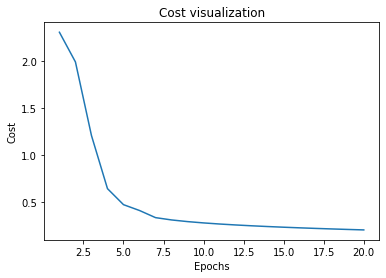

In [65]:
plt.plot(np.linspace(1, N_EPOCHS, N_EPOCHS), costList)
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.title("Cost visualization")
plt.show()

Increase the iterations to improve the accuracy a little more.

In [62]:
# TESTING:

Z1 = np.matmul(W1, X_test) + b1
A1 = sigmoid(Z1)

Z2 = np.matmul(W2, A1) + b2
A2 = softmax(Z2)

predictions = np.argmax(A2, axis=0)
labels = np.argmax(Y_test, axis=0)

print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

[[ 966    0    8    1    1    8   10    3    5   10]
 [   0 1109    3    2    2    1    3    7    3    7]
 [   2    3  964   15    4    3    6   25    6    1]
 [   1    2    8  942    0   22    0    3   16   11]
 [   0    1    9    0  930    4    9    6    9   26]
 [   3    1    2   22    0  818   11    0    8    6]
 [   6    5   10    2   12   10  916    0   14    1]
 [   1    2   10    7    2    4    1  955    8   14]
 [   1   12   16   12    3   13    2    2  901    6]
 [   0    0    2    7   28    9    0   27    4  927]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1012
           1       0.98      0.98      0.98      1137
           2       0.93      0.94      0.94      1029
           3       0.93      0.94      0.93      1005
           4       0.95      0.94      0.94       994
           5       0.92      0.94      0.93       871
           6       0.96      0.94      0.95       976
           7       0.93      0.95   

In [66]:
# VISUALIZATION OF OUR RESULTS:

n_images = 5

def predict(i): # Predicts label for i-th element in X_test
    Z1 = np.matmul(W1, X_test) + b1
    A1 = sigmoid(Z1)

    Z2 = np.matmul(W2, A1) + b2
    A2 = softmax(Z2)
    
    return np.round(A2[:, i])

def slideshow():
    a = np.random.choice(10000, n_images)
    for i in a:
        plt.imshow(X_test[:,i].reshape(28,28), cmap = "gray")
        plt.title("Actual Label  : {}".format(np.where(Y_test[:,i]==1)[0][0])+"\n"+
                  "Prediction: {}".format(np.where(predict(i)==1)[0][0]))
        plt.axis("off")
        plt.show()

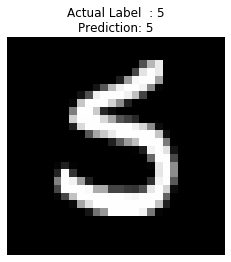

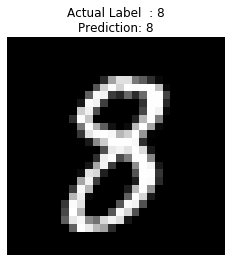

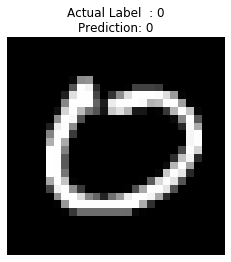

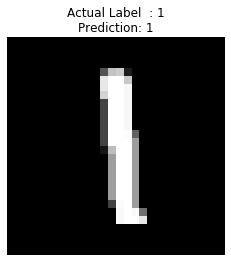

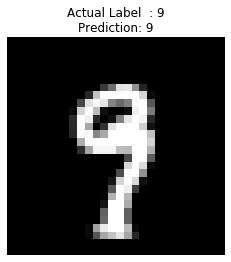

In [67]:
slideshow()